<a href="https://colab.research.google.com/github/sunayandoli/sunayandoli/blob/master/Sunayan07Inclass%20week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
upload = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
init_notebook_mode(connected=True)

In [7]:
df_reviews = pd.read_csv("./googleplaystore.csv")
df_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df_apps = pd.read_csv("./googleplaystore.csv")
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
categories = list(df_apps["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
categories.remove('1.9')

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [10]:
a = df_apps.loc[df_apps["Category"] == "1.9"]
print(a.head())
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))
df_apps = df_apps.drop(int(a.index.values),axis=0)

                                           App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]
This mislabeled app category affects 1 app at index 10472.


In [11]:
df_apps['Rating'].isnull().sum()

1474

In [12]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [13]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [14]:
df_apps["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [16]:
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=df_apps["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

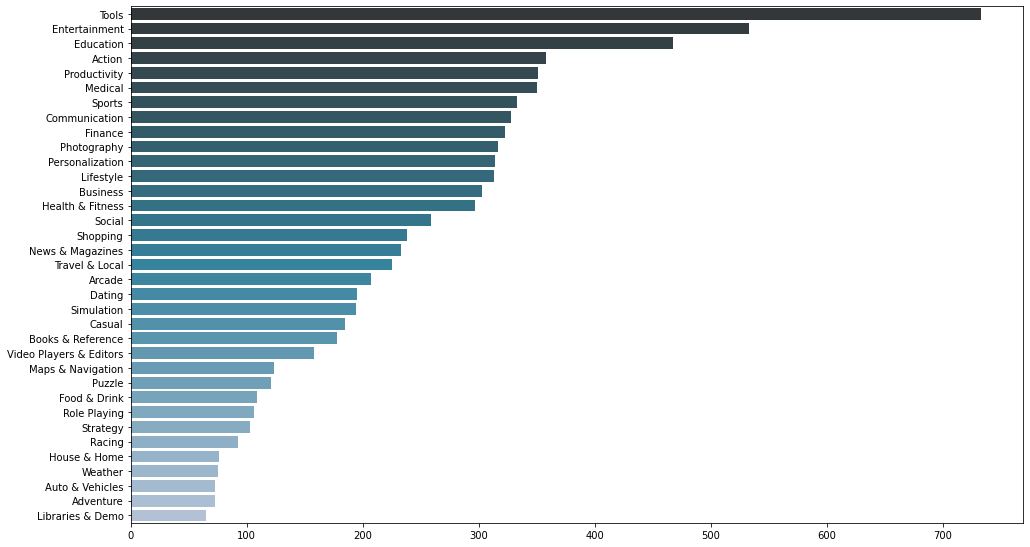

In [17]:
plt.figure(figsize=(16, 9.5))
genres = df_apps["Genres"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")

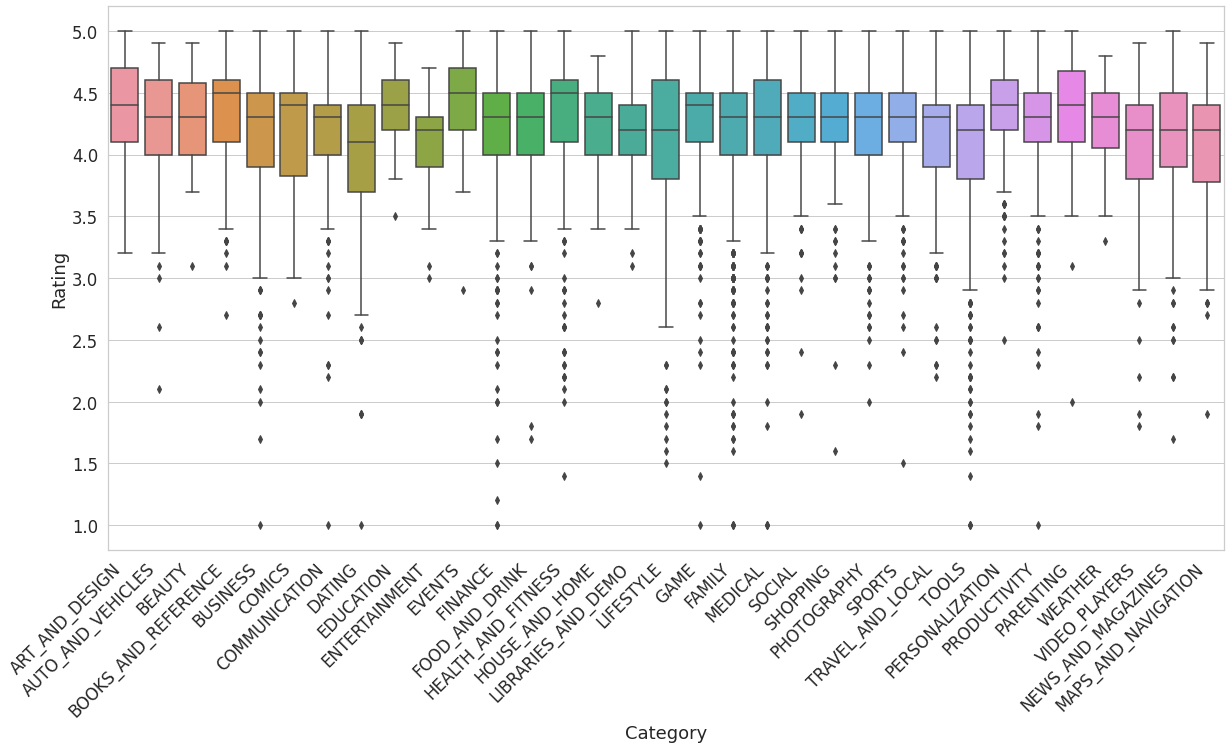

In [18]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_apps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [19]:
highRating = df_apps.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

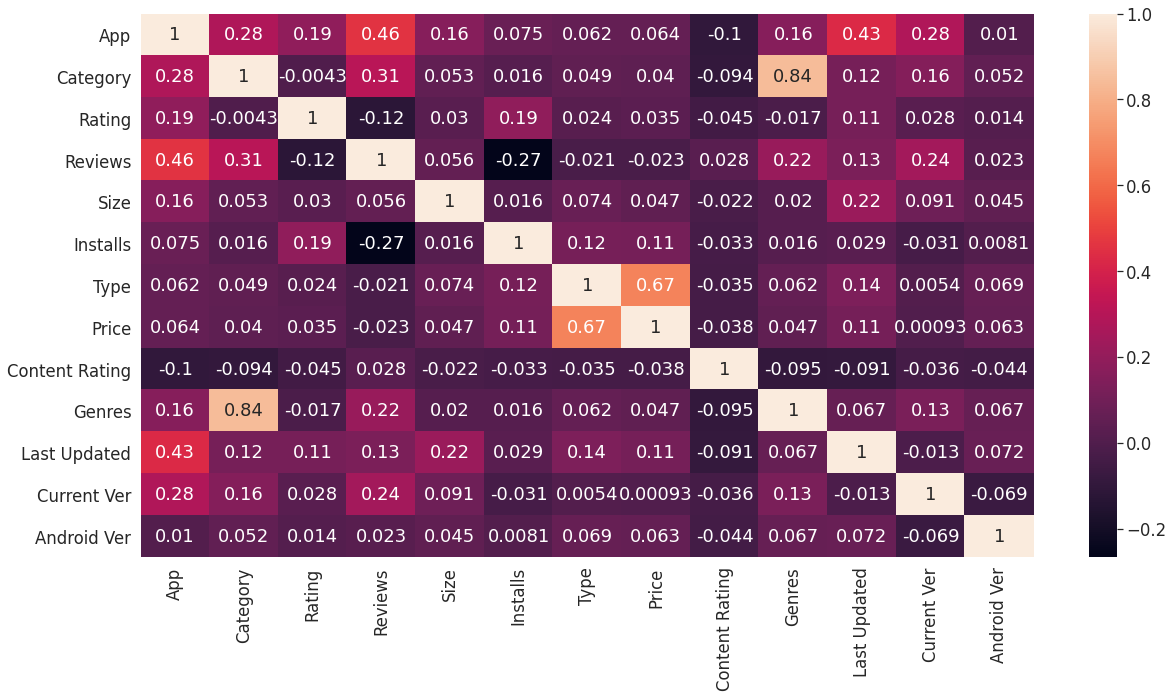

In [20]:
df_apps.dtypes
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

In [21]:
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


In [22]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(4568*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)
print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

There are 8892 total rows.
4568 Apps are Popular!
4324 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing

Cut 1010 apps off Popular df for a total of 3558 Popular training apps.
Cut 766 apps off Unpopular df for a total of 3558 Unpopular training apps.

Values were not dropped from training dataframe. False
Values were not dropped from training dataframe. False


In [24]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))
X_test.head(3)

7116 Apps are used for Training.
1776 Apps are used for Testing.


,Category,Size,Type,Price,Content Rating,Genres
0,11,60000000.0,0,0.0,1,101
1,14,31000000.0,0,0.0,4,0
2,11,48000000.0,0,0.0,1,94


In [25]:
popularity_classifier = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)
popularity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=29,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
predictions = popularity_classifier.predict(X_test)
print("Predicted: ",predictions[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]


In [27]:

accuracy_score(y_true = y_test, y_pred = predictions)

0.722972972972973

In [28]:
X_testCopy = X_test.copy()
X_testCopy["Popular?"] = y_test
X_testCopy[X_test["Size"] == 3600000].head(10)

,Category,Size,Type,Price,Content Rating,Genres,Popular?
112,11,3600000.0,0,0.00,1,50,0
616,12,3600000.0,0,0.00,1,58,0
1297,19,3600000.0,0,0.00,1,68,1
1310,31,3600000.0,0,0.00,4,110,0
1352,23,3600000.0,1,0.99,1,78,0
